In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [33]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/TAIPEI_diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


# **Data Cleaning**

1. **Load and Inspect the Data**

In [34]:
# Check for basic info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check statistical summary
print("\nStatistical Summary:\n", data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB

Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                

2. **Handle Missing Values**

In [35]:
# Fill missing values with mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Drop rows with too many missing values (optional)
# data.dropna(thresh=some_threshold, inplace=True)


3. **Detect Outliers**

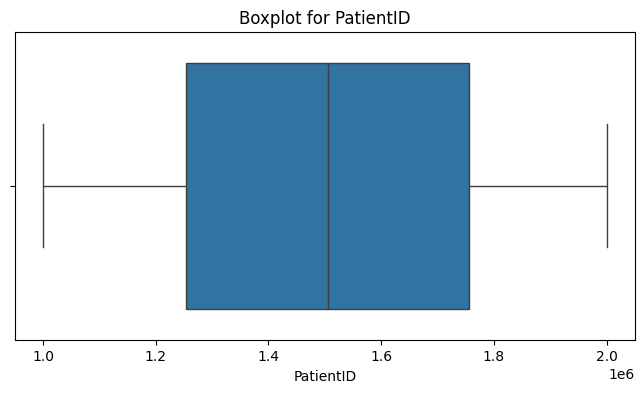

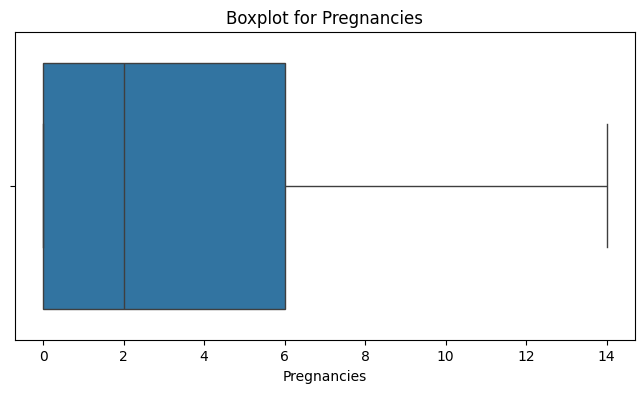

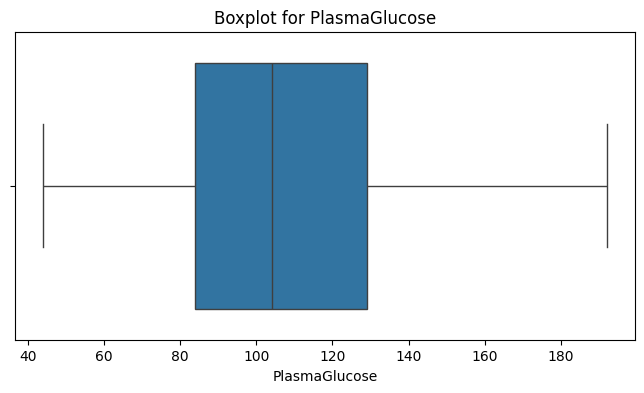

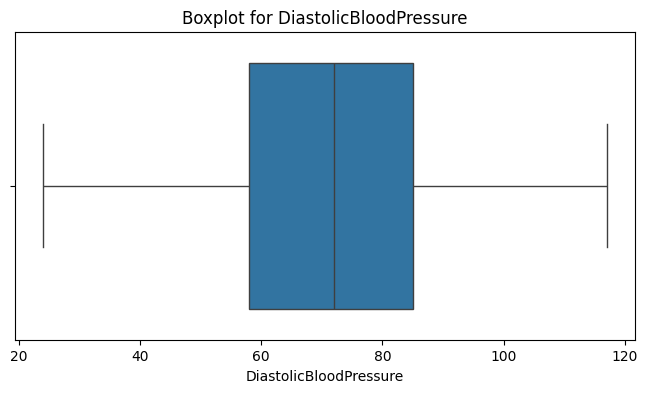

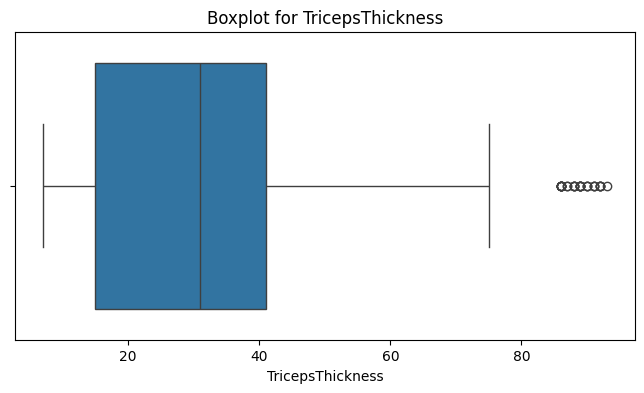

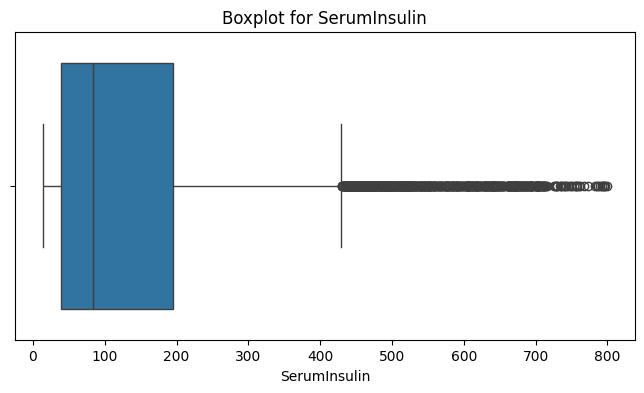

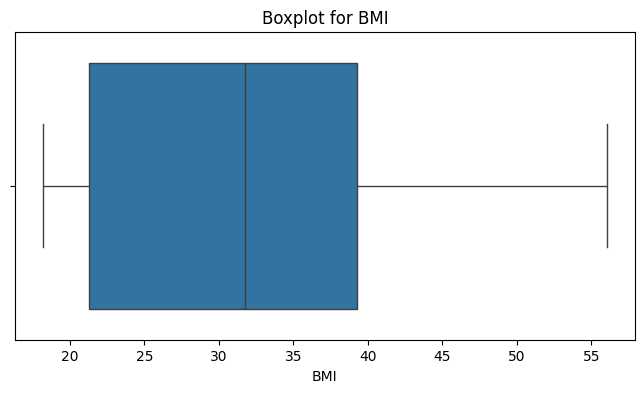

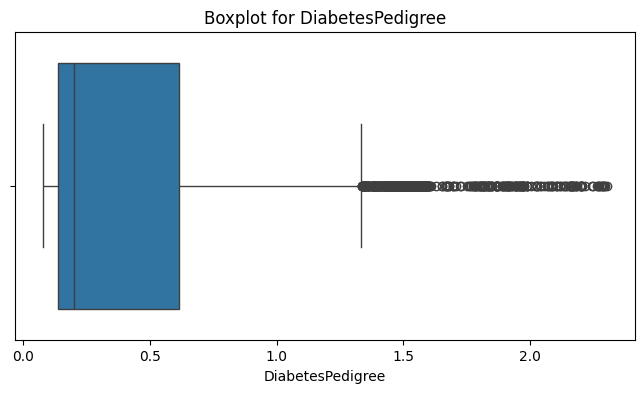

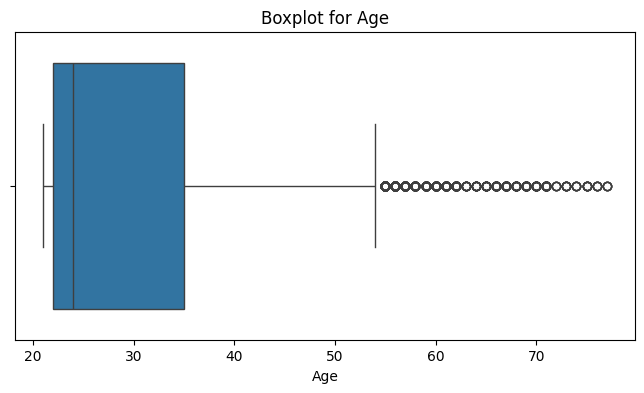

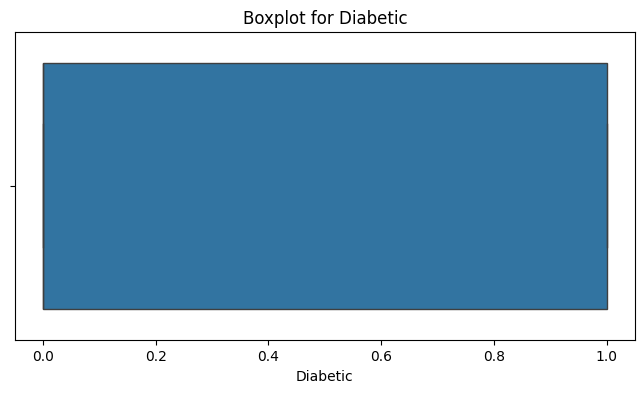

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [37]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data[numeric_cols].apply(zscore)

# Identify rows where z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)

# Show rows with outliers
print("\nOutliers:\n", data[outliers])



Outliers:
        PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
30       1121857           11             75                      89   
33       1140806            3            123                      61   
48       1662484            6             73                      61   
67       1687914            4            104                      68   
87       1929520            2            104                      62   
...          ...          ...            ...                     ...   
14897    1694466            3            110                      74   
14900    1833840            0            109                      80   
14934    1345247            0             92                      44   
14938    1938060            1            114                      81   
14943    1867287            1            119                      42   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
30                    8           541  29.422754

4. **Address Outliers**


**Capping outliers refers to limiting or "clipping" the values of outliers to a certain range, usually defined by the percentile values of the data. here instead of removing outliers completely, we cap them to a threshold value**

In [38]:
# Option 1: Remove outliers
data_cleaned = data[~outliers]

# Option 2: Cap outliers at 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.99)
    lower_limit = data[col].quantile(0.01)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


5. **Verify Data Cleaning**

In [39]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
           PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.216067     107.830800               71.260200   
std    2.890987e+05      3.367195      31.832516               16.436073   
min    1.010237e+06      0.000000      48.000000               39.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               8

# **Feature Extraction**

In [40]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0


In [42]:
df = data.copy()

In [43]:
import pandas as pd

# 1. BMI-to-Age Ratio
df['BMI_Age_Ratio'] = df['BMI'] / df['Age']

# 2. Insulin Sensitivity Index (ISI)
df['ISI'] = 10000 / (df['PlasmaGlucose'] * df['SerumInsulin'])

# 3. Blood Pressure Normalized by Age (BP-Age Ratio)
df['BP_Age_Ratio'] = df['DiastolicBloodPressure'] / df['Age']

# 4. High-Risk Pregnancy Index
df['HighRiskPregnancy'] = (df['Pregnancies'] * df['BMI']) / df['Age']

# 5. Glucose-Insulin Product
df['Glucose_Insulin'] = df['PlasmaGlucose'] * df['SerumInsulin']

# 6. Pregnancies-to-Age Ratio
df['Pregnancies_Age_Ratio'] = df['Pregnancies'] / df['Age']

# 7. Metabolic Risk Score
df['Metabolic_Risk'] = (df['BMI'] + df['PlasmaGlucose'] + df['DiastolicBloodPressure']) / 3

# 8. Pedigree-Adjusted Glucose
df['Pedigree_Glucose'] = df['PlasmaGlucose'] * df['DiabetesPedigree']

# 9. Fat Distribution Index
df['Fat_Index'] = (df['BMI'] + df['TricepsThickness']) / 2


In [44]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  float64
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
 10  BMI_Age_Ratio           15000 non-null  float64
 11  ISI                     15000 non-null  float64
 12  BP_Age_Ratio            15000 non-null  float64
 13  HighRiskPregnancy       15000 non-null  float64
 14  Glucose_Insulin         15000 non-null

In [45]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0


In [46]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0,2.071892,2.542588,3.809524,0.000000,3933,0.000000,98.169909,207.455722,38.754863
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0,0.923503,3.019324,4.043478,7.388026,3312,0.347826,68.746859,14.569578,34.120288
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0,1.804849,2.484472,2.043478,12.633942,4025,0.304348,67.837174,9.268180,46.755762
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1,0.687958,0.319366,1.813953,6.191622,31312,0.209302,70.194064,132.135594,27.291096
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.936570,2975,0.045455,62.201512,46.711059,34.802268


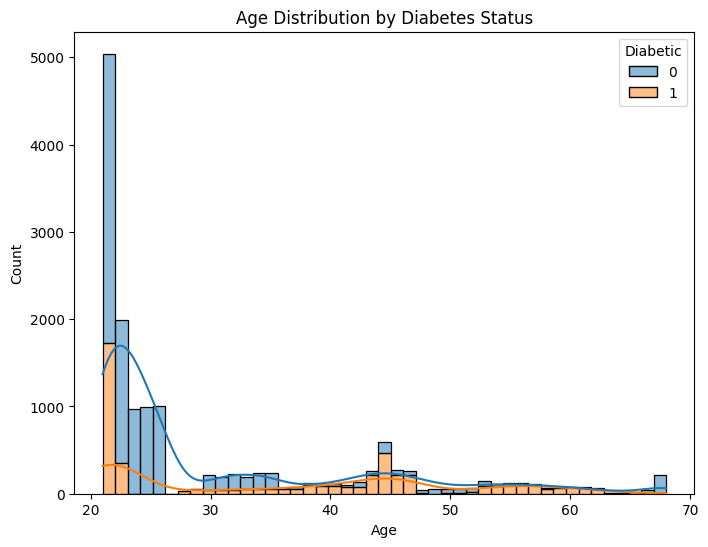

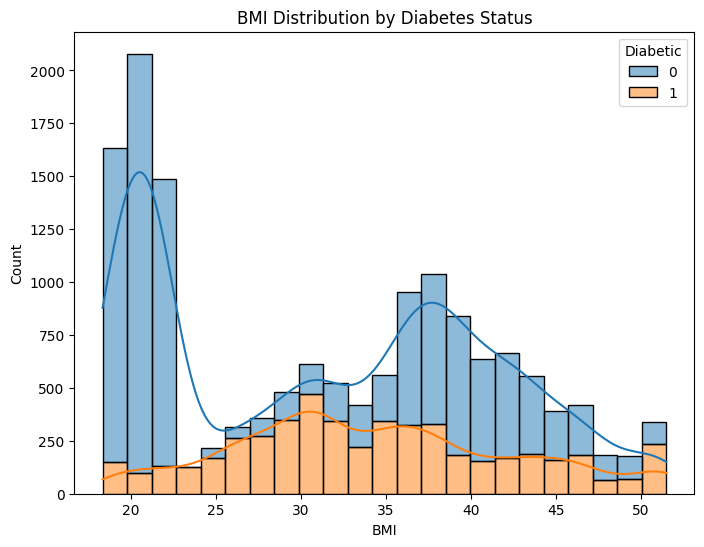

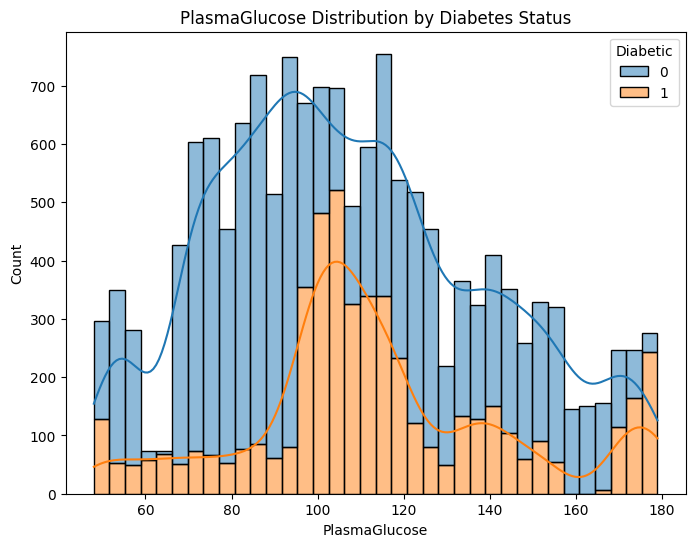

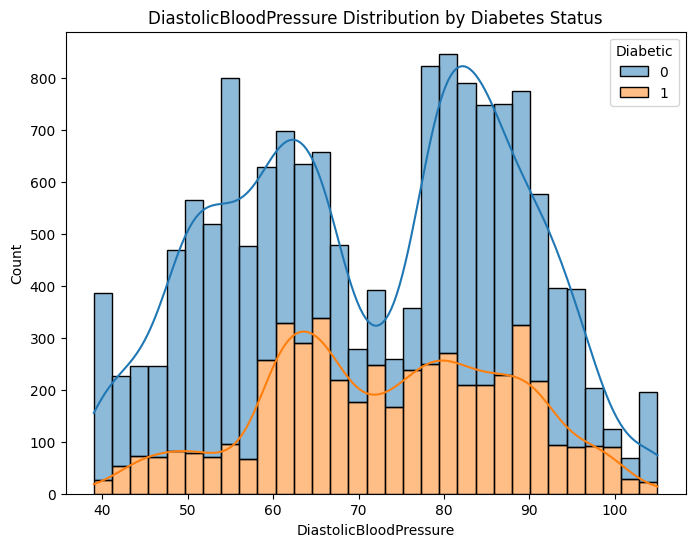

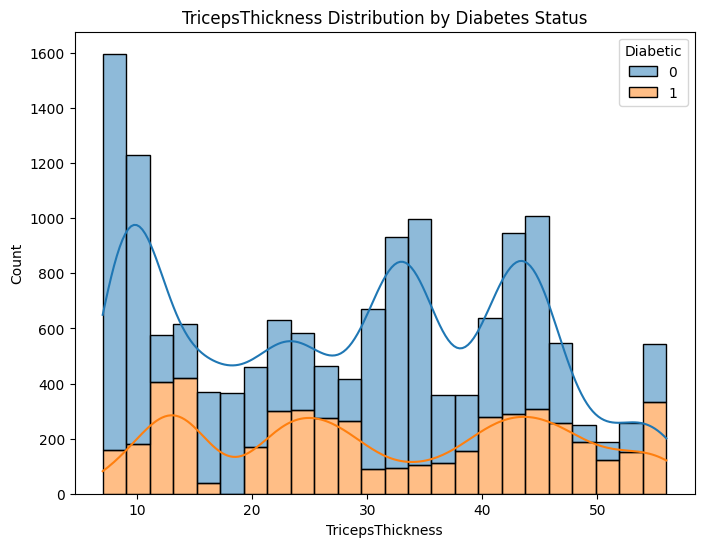

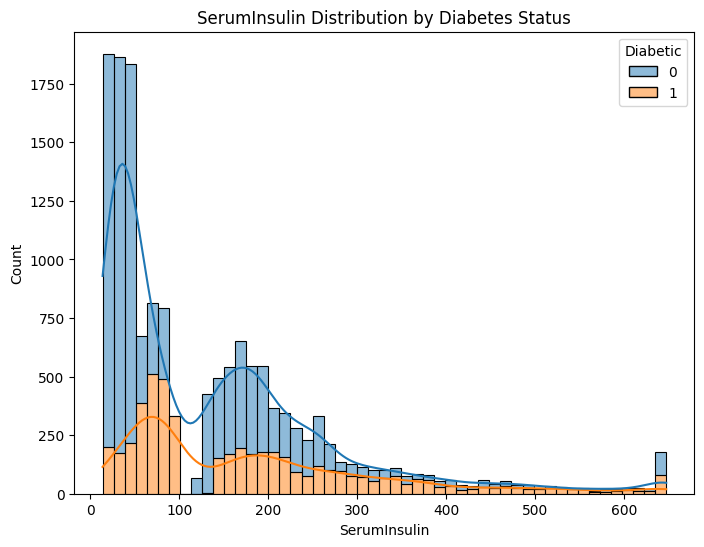

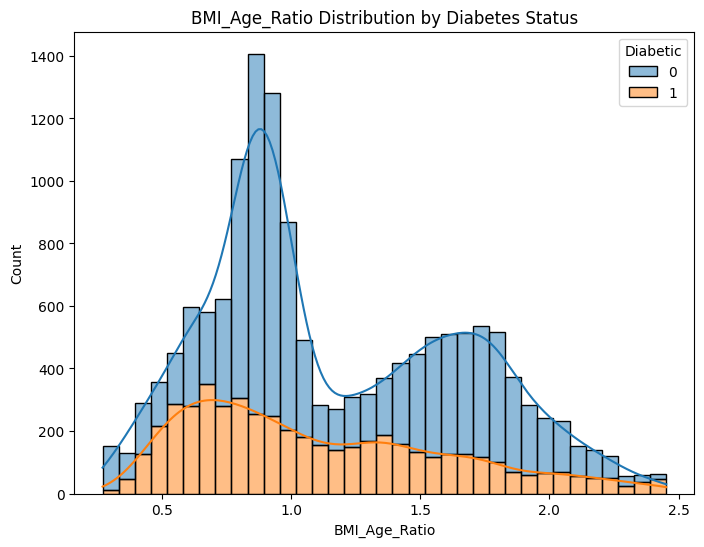

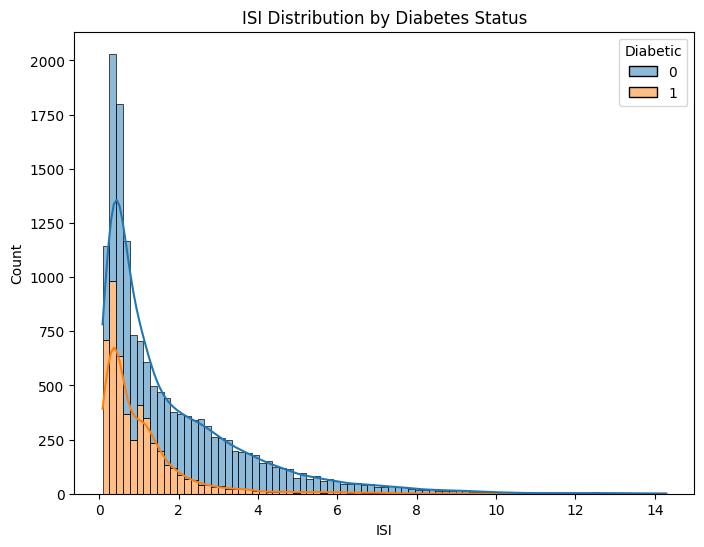

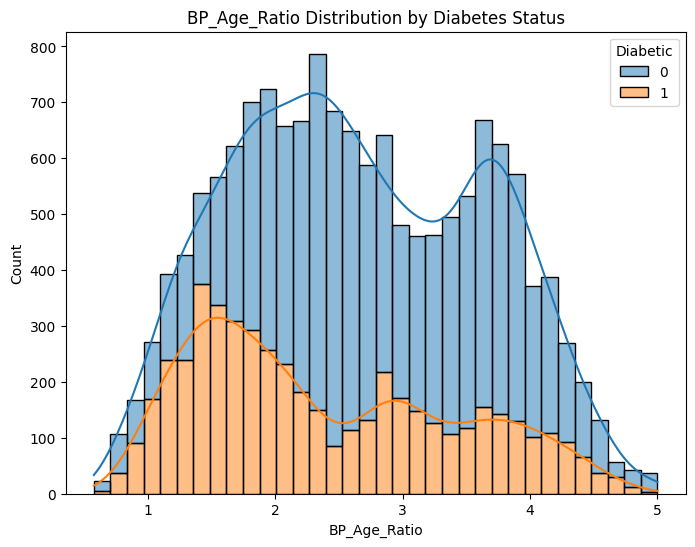

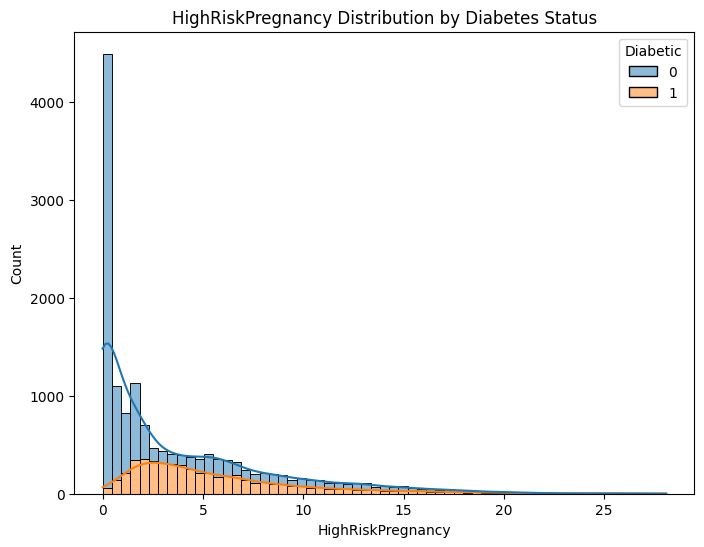

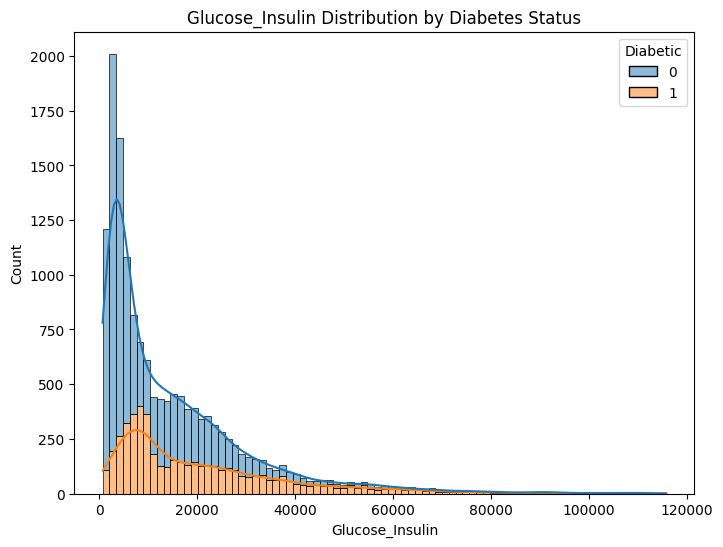

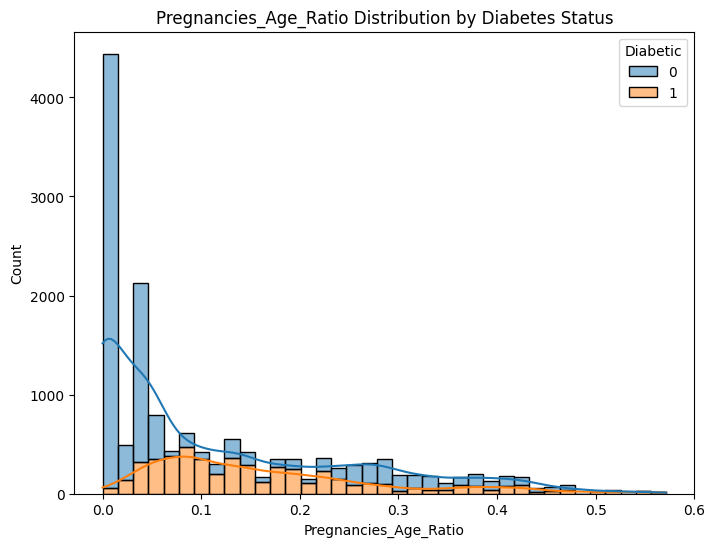

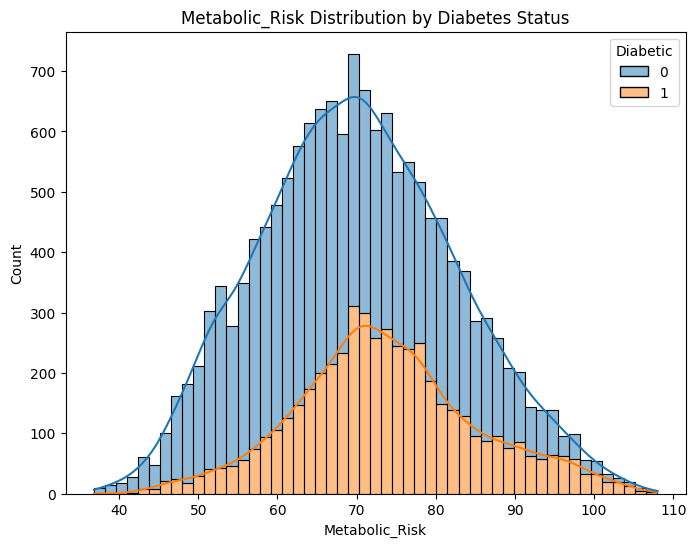

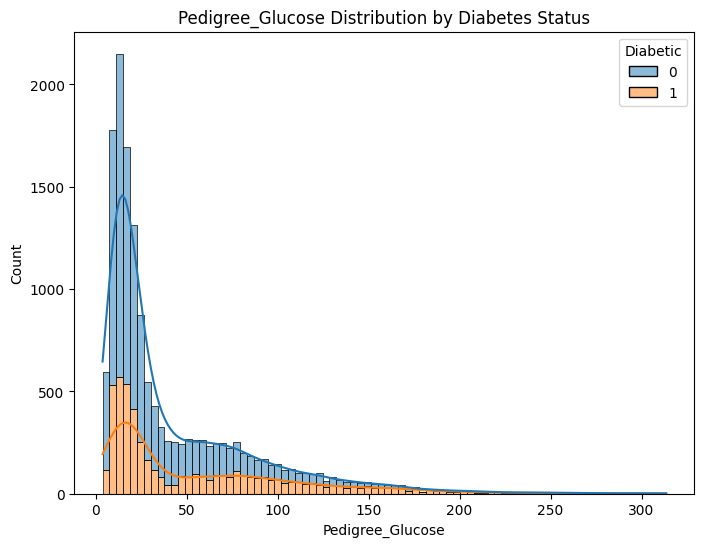

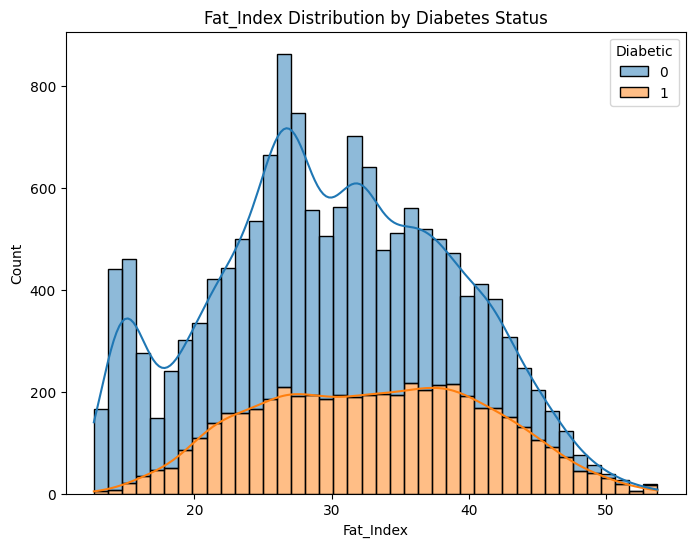

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = [
    'Age', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin', 'BMI_Age_Ratio', 'ISI', 'BP_Age_Ratio', 'HighRiskPregnancy',
    'Glucose_Insulin', 'Pregnancies_Age_Ratio', 'Metabolic_Risk', 'Pedigree_Glucose', 'Fat_Index'
]

# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetic', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## **Correlation Heatmap**


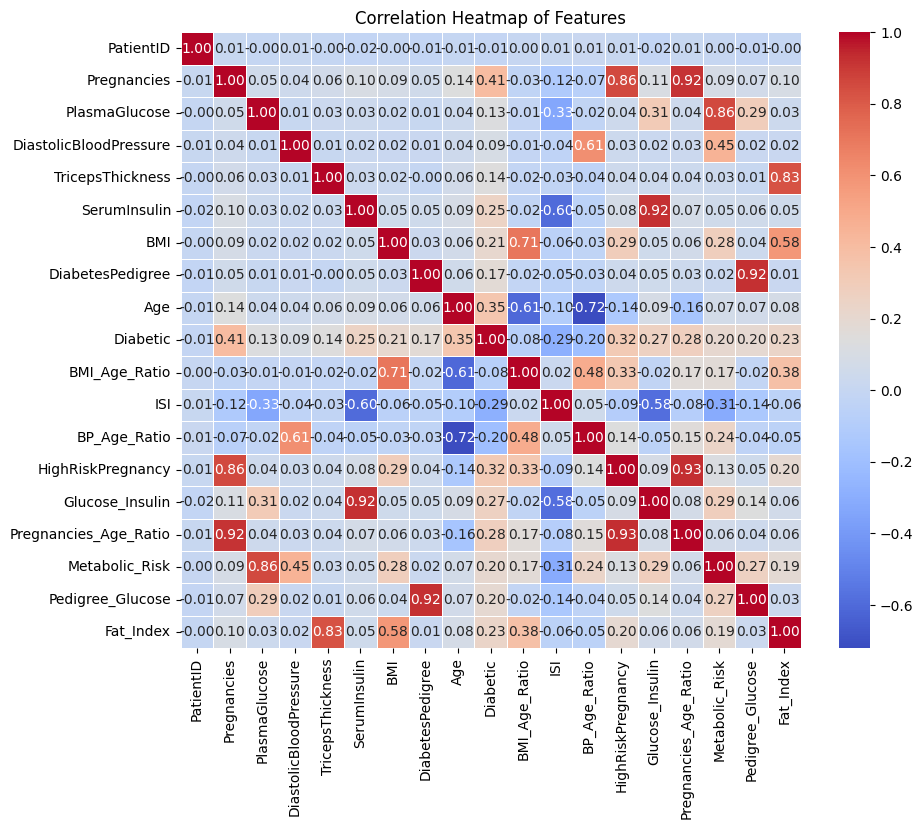

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


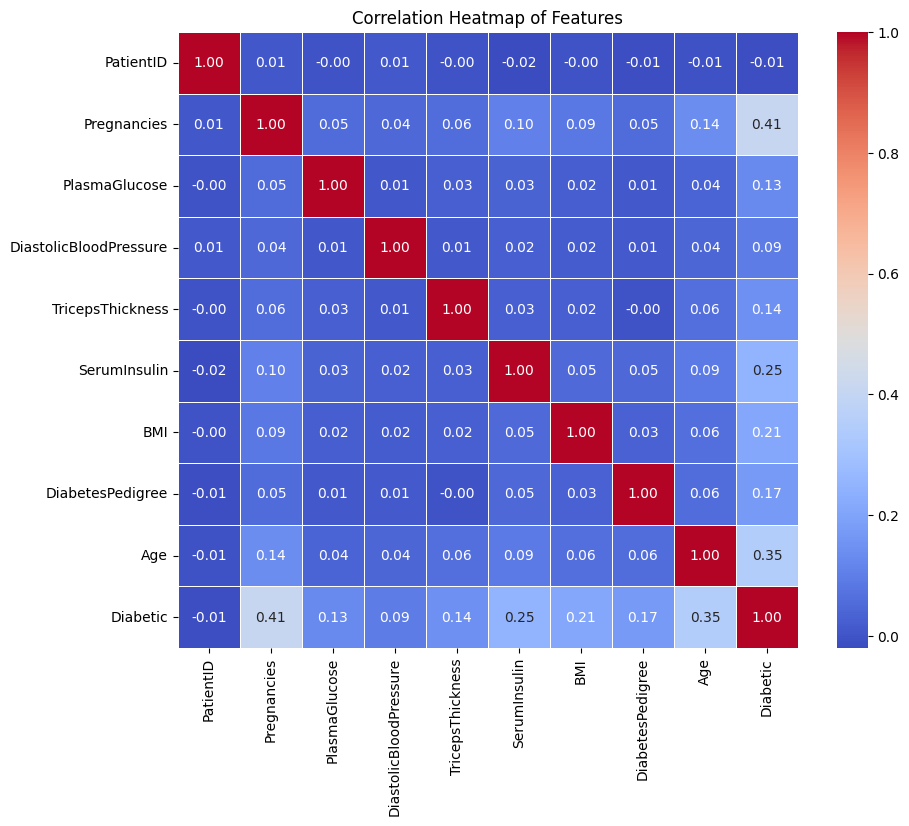

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [59]:
X = df.drop(columns=['Diabetic'])
y = df['Diabetic']  # target

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [61]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2014
           1       0.90      0.86      0.88       986

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000


Confusion Matrix:
[[1919   95]
 [ 134  852]]


Accuracy: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2014
           1       0.90      0.86      0.88       986

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000


Confusion Matrix:
[[1919   95]
 [ 134  852]]


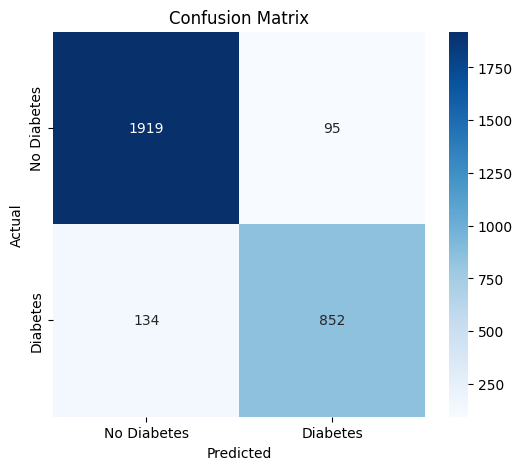

In [62]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print detailed classification report (precision, recall, F1-score, etc.)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optionally, plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [63]:
import numpy as np
import pandas as pd

# Random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
test_data = {
    'Pregnancies': np.random.randint(0, 10, 10),  # Random number of pregnancies
    'PlasmaGlucose': np.random.randint(70, 200, 10),  # Random plasma glucose levels
    'DiastolicBloodPressure': np.random.randint(60, 120, 10),  # Random diastolic blood pressure
    'TricepsThickness': np.random.randint(10, 50, 10),  # Random triceps skinfold thickness
    'SerumInsulin': np.random.randint(0, 900, 10),  # Random serum insulin levels
    'BMI': np.random.uniform(18, 40, 10),  # Random BMI values
    'DiabetesPedigree': np.random.uniform(0, 1, 10),  # Random diabetes pedigree function
    'Age': np.random.randint(21, 60, 10),  # Random age between 21 and 60
    'Diabetic': np.random.choice([0, 1], 10)  # Random diabetic labels (0 = No, 1 = Yes)
}

# Convert the dictionary to a DataFrame
test_df = pd.DataFrame(test_data)

# Optionally, display the generated data
print(test_df)


   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            6            169                     103                12   
1            3            173                      84                46   
2            7            122                     108                16   
3            4             71                      86                30   
4            6            157                     118                18   
5            9            107                     101                48   
6            2            199                      87                27   
7            6             90                     119                13   
8            7            127                      75                34   
9            4             91                      74                23   

   SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0           241  28.893892          0.775133   38         1  
1           776  18.756547          0.939499   44 

**Overfitting:** The model shows perfect training accuracy (100%), but it doesn't perform equally well on the test set (92.37%). While the drop in accuracy from 100% to 92% isn't huge, it's an indication that the model might be overfitting to the training data. This is especially visible with the perfect recall and precision on the training set.

**Balanced Precision and Recall:** The model performs fairly well on both classes, with slightly higher recall for non-diabetic individuals (class 0). This means the model does a good job identifying most non-diabetic patients but misses some of the diabetic cases (lower recall for class 1).

**F1-Scores:** The F1-scores of 0.94 and 0.88 indicate that the model performs better for class 0, but overall, the performance is good for both classes. An F1-score closer to 1 for both classes would be ideal, but these results are acceptable.

In [64]:
# Evaluate the model on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0000
Test Accuracy: 0.9237

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7986
           1       1.00      1.00      1.00      4014

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2014
           1       0.90      0.86      0.88       986

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000



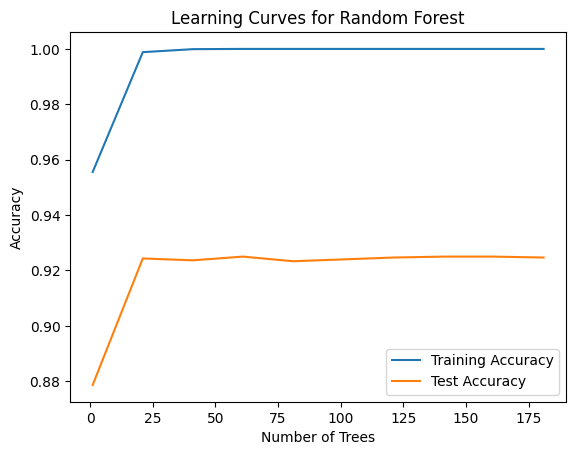

In [65]:
import matplotlib.pyplot as plt

# Plotting training and test accuracy
train_accuracies = []
test_accuracies = []

# Simulating learning curves by retraining and plotting
for i in range(1, 201, 20):
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(X_train, y_train)

    train_accuracies.append(accuracy_score(y_train, rf_model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, rf_model.predict(X_test)))

plt.plot(range(1, 201, 20), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 201, 20), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()


## **ROC Curve and AUC (Area Under the Curve)**

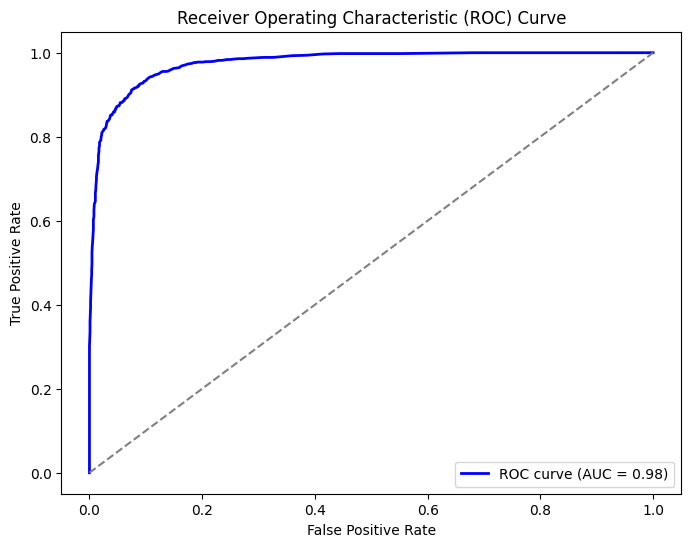

In [66]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 ##  **Precision-Recall Curve**

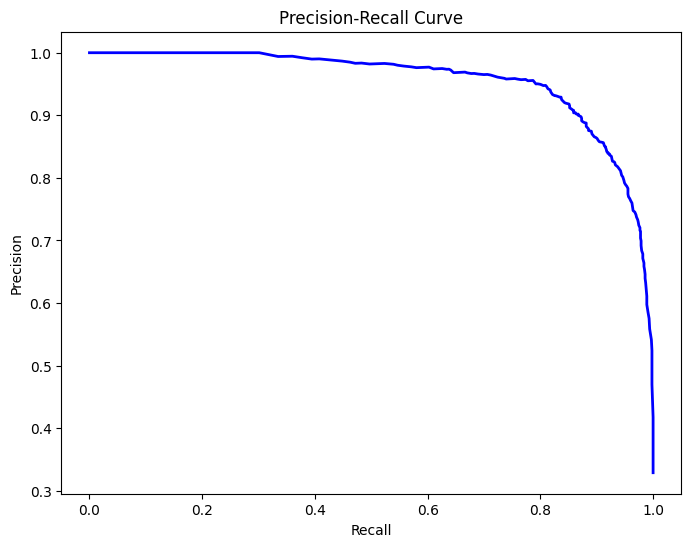

In [67]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## **Cross-Validation Performance**

In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')


Cross-Validation Scores: [0.93791667 0.93083333 0.93041667 0.93416667 0.93583333]
Mean Cross-Validation Accuracy: 0.9338
